# **Regression on Boston Dataset :**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# Get the data set from sklearn library:
from sklearn.datasets import load_boston 
boston = load_boston()

C:\Users\ANUNOY\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [35]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [36]:
# Get the data set from the bunch :
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [37]:
# Add  the price column with main data sets:
df["Price"] = boston.target

In [38]:
# short information about data sets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
# Check the null value:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

C:\Users\ANUNOY\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


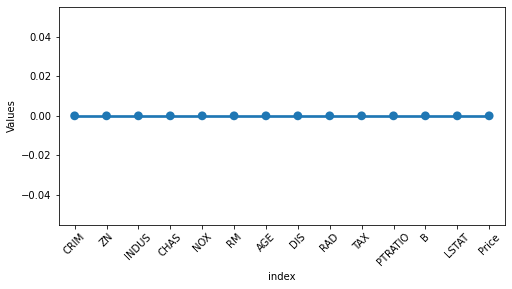

<AxesSubplot:xlabel='index', ylabel='Values'>

In [40]:
# Plot a missing value graph
missing = pd.DataFrame(df.isnull().sum().reset_index())
missing = missing.rename(columns={0:"Values"})
plt.figure(figsize=(8,4))
plt.xticks(rotation=45,fontsize=10)
sns.pointplot("index","Values",data=missing)

In [41]:
# Find the relations between Independent and Dependent Features:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


C:\Users\ANUNOY\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


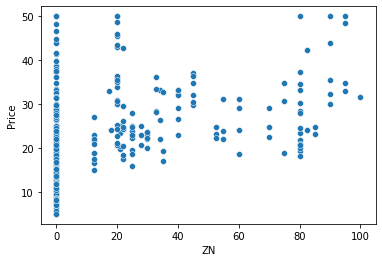

<AxesSubplot:xlabel='ZN', ylabel='Price'>

In [42]:
# Plot Scatter plot in ZN and Price :
sns.scatterplot("ZN","Price",data=df)

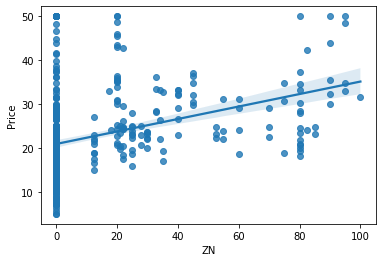

<AxesSubplot:xlabel='ZN', ylabel='Price'>

In [43]:
# Plot a regression on ZN and Price:
sns.regplot(x="ZN",y="Price",data=df)

C:\Users\ANUNOY\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


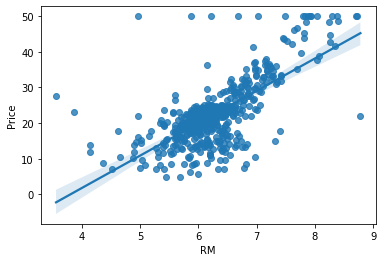

<AxesSubplot:xlabel='RM', ylabel='Price'>

In [44]:
# plot a regression plot on RM and price :
sns.regplot("RM","Price",data=df)

In [45]:
# split the Data sets in Independent and Dependent:
X = df.iloc[:,:13]
y = df.iloc[:,-1] 

In [46]:
# Perform a train_test split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
# Scaled the X data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [48]:
# BUild a regression Model:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [49]:
# get the regression cofficient:
print(regression.coef_)

[-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]


In [50]:
 # get the intercept :
 print(regression.intercept_)

22.611881188118836


In [51]:
# get the parameters on which the model has been trained :
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [52]:
# predict with test data :
pred_reg = regression.predict(X_test)

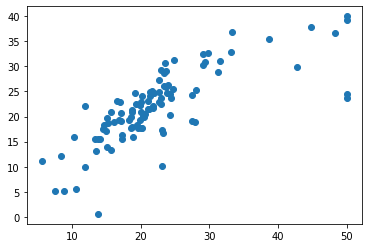

In [53]:
# Confusion Metrics not work on float values:
# Ploat a scatter plot on predict data an y_test data
plt.scatter(y_test,pred_reg)

In [54]:
# Find the residuals:
residuals = y_test-pred_reg

In [55]:
residuals

329    -2.289638
371    26.278589
219    -6.364999
403    -3.822386
78     -0.243823
         ...    
56     -0.742171
455    -1.471783
60      0.762805
213     2.794112
108    -2.573233
Name: Price, Length: 102, dtype: float64

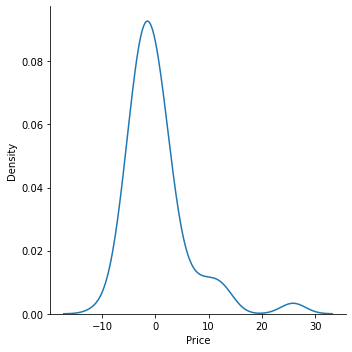

In [56]:
# plot a displot to visualize the outliers:
sns.displot(residuals,kind='kde')

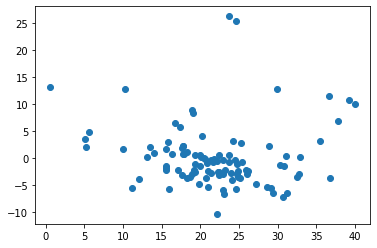

In [57]:
# Plot a Scatter plot with respect to prediction and residuals:
plt.scatter(pred_reg,residuals)

## **Predict New Data :**

In [58]:
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [59]:
# scaled the data new data for prediction :
new_data=scale.transform(boston.data[0].reshape(1,-1))

C:\Users\ANUNOY\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
# Predict the new data in model :
regression.predict(new_data)

array([30.49949836])

In [61]:
# Lets Pickling the regression model for Deployment :
# To generate a picle file a mandatory path needs to pass to save the picklefile:
import pickle
pickle.dump(regression, open('C:/Users/ANUNOY/Downloads/regmodel.pkl','wb'))

In [62]:
# To Open the pickled filed :
pickled_model = pickle.load(open('C:/Users/ANUNOY/Downloads/regmodel.pkl','rb'))

In [63]:
# Now re call the pickled file for new prediction :
pickled_model.predict(new_data)

array([30.49949836])